<a href="https://colab.research.google.com/github/penkovgd/itmo-dl-course/blob/main/lab2_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В рамках этой лабораторной работы будут использоваться сверточные нейронные сети. Набор библиотек прежний, импортируйте все необходимые слои и т.п., задачи - классификация на изображениях.

In [ ]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

# MNIST

## Классификация

В первую очередь вернемся к MNIST и решим вё ту же задачу классификации изображений, используя сверточную архитектуру. Также допускается использование Dropout, pooling, flatten. Выходной слой - полносвязный. Значение точности выше 98% считается удовлетворительным для выполнения этого пункта. Постройте кривые обучения для обучающей и валидационной выборок.  

In [ ]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255

x_train, x_val = train_images[:50000], train_images[50000:]
y_train, y_val = train_labels[:50000], train_labels[50000:]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model = keras.Sequential(
    [
        layers.Conv2D(filters=32, kernel_size=3, activation="relu"),
        layers.MaxPooling2D(pool_size=2),
        layers.Conv2D(filters=64, kernel_size=3, activation="relu"),
        layers.MaxPooling2D(pool_size=2),
        layers.Conv2D(filters=128, kernel_size=3, activation="relu"),
        layers.Flatten(),
        layers.Dense(10, activation="softmax"),
    ]
)
model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=256,
    shuffle=True,
    validation_data=(x_val, y_val),
)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.7783 - loss: 0.8271 - val_accuracy: 0.9724 - val_loss: 0.0982
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9715 - loss: 0.0914 - val_accuracy: 0.9815 - val_loss: 0.0683
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9832 - loss: 0.0571 - val_accuracy: 0.9856 - val_loss: 0.0519
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9871 - loss: 0.0427 - val_accuracy: 0.9874 - val_loss: 0.0450
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9896 - loss: 0.0347 - val_accuracy: 0.9875 - val_loss: 0.0460
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9907 - loss: 0.0290 - val_accuracy: 0.9892 - val_loss: 0.0374
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9921 - loss: 0.0242 - val_accuracy: 0.9891 - val_loss: 0.0368
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9928 - loss: 0.0216 - val_accuracy: 

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 312,608 (1.19 MB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 208,406 (814.09 KB)

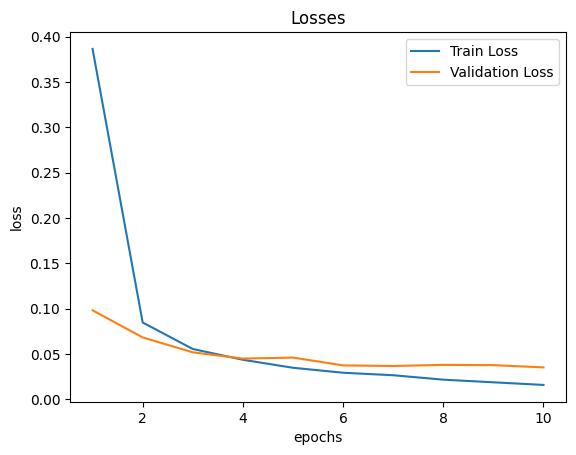

In [ ]:
train_loss_history = history.history["loss"]
val_loss_history = history.history["val_loss"]
epochs = range(1, 11)
plt.plot(epochs, train_loss_history, label="Train Loss")
plt.plot(epochs, val_loss_history, label="Validation Loss")
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

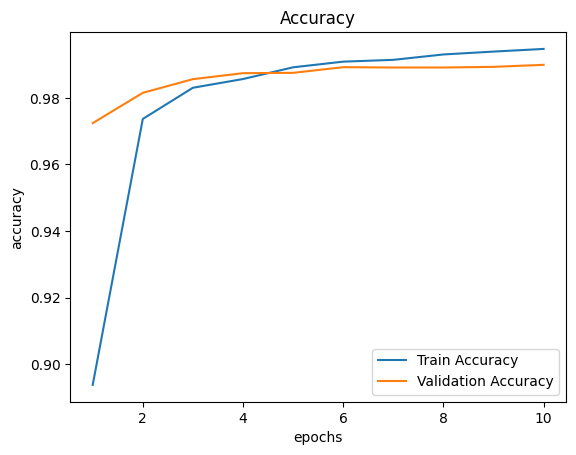

In [ ]:
train_acc_history = history.history["accuracy"]
val_acc_history = history.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, train_acc_history, label="Train Accuracy")
plt.plot(epochs, val_acc_history, label="Validation Accuracy")
plt.title("Accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
test_loss, test_accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9878 - loss: 0.0369


(0.028638869524002075, 0.9909999966621399)

## Автоэнкодер

Пока мы не отошли от MNIST, на этом же датасете обучите автоэнкодер, выходом которого должны быть картинки того же размера. Выведете несколько исходных картинок в паре с их обработанными вариантами по итогу обучения.

In [ ]:
autoencoder = keras.Sequential(
    [
        # encoder
        layers.Conv2D(
            filters=16, kernel_size=3, activation="relu", padding="same"
        ),  # (batch, 28, 28, 1) -> (batch, 28, 28, 16)
        layers.MaxPooling2D(
            pool_size=2, padding="same"
        ),  # (batch, 28, 28, 16) -> (batch, 14, 14, 16)
        layers.Conv2D(
            filters=8, kernel_size=3, activation="relu", padding="same"
        ),  # (batch, 14, 14, 16) -> (batch, 14, 14, 8)
        layers.MaxPooling2D(
            pool_size=2, padding="same"
        ),  # (batch, 14, 14, 8) -> (batch, 7, 7, 8)
        # decoder
        layers.Conv2D(
            filters=8, kernel_size=3, activation="relu", padding="same"
        ),  # (batch, 7, 7, 8) -> (batch, 7, 7, 8)
        layers.UpSampling2D(size=(2, 2)),  # (batch, 7, 7, 8) -> (batch, 14, 14, 8)
        layers.Conv2D(
            filters=16, kernel_size=3, activation="relu", padding="same"
        ),  # (batch, 14, 14, 8) -> (batch, 14, 14, 16)
        layers.UpSampling2D(size=(2, 2)),  # (batch, 14, 14, 16) -> (batch, 28, 28, 16)
        layers.Conv2D(
            filters=1, kernel_size=3, activation="sigmoid", padding="same"
        ),  # (batch, 28, 28, 16) -> (batch, 28, 28, 1)
    ]
)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.fit(
    x_train,
    x_train,
    epochs=5,
    batch_size=128,
    shuffle=True,
    validation_data=(x_val, x_val),
)
autoencoder.summary()

Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.2839 - val_loss: 0.0954
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0917 - val_loss: 0.0869
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0851 - val_loss: 0.0826
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0815 - val_loss: 0.0801
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0789 - val_loss: 0.0783


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 8)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 8)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 8)        │           584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 8)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 16)     │         1,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 28, 28, 1)      │           145 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,653 (37.71 KB)

 Trainable params: 3,217 (12.57 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,436 (25.14 KB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 504ms/step


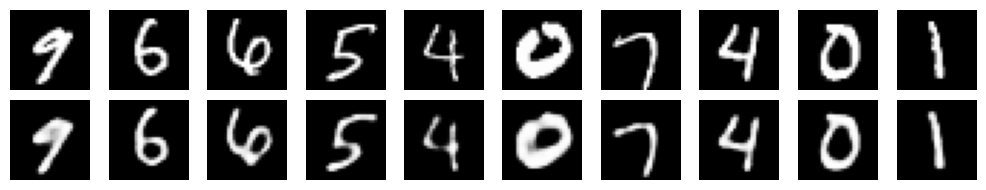

In [ ]:
true_images = test_images[20:30]
pred_images = autoencoder.predict(true_images)

fig, axes = plt.subplots(nrows=2, ncols=len(true_images), figsize=(10, 2))
plt.gray()
for i in range(len(true_images)):
    axes[0, i].imshow(true_images[i])
    axes[0, i].axis("off")
    axes[1, i].imshow(pred_images[i])
    axes[1, i].axis("off")

plt.tight_layout()
plt.show()

# Классификация кошек/собак

Теперь - задача бинарной классификации. Импортируйте датасет по ссылке: https://www.kaggle.com/datasets/tongpython/cat-and-dog. Можно загрузить его на google drive или же подгрузить прямо по ссылке с помощью библиотеки opendatasets. Выполните классификацию с помощью обычной сверточной сети, resnet50 (weights=None) и vgg16. Сравните динамику (на кривых обучения), скорость и конечные результаты обучения.

### Моя CNN

In [ ]:
%pip install opendatasets -q

In [ ]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/datasets/tongpython/cat-and-dog'
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: georgus
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog


100%|██████████| 218M/218M [00:00<00:00, 821MB/s] 


In [ ]:
model = keras.Sequential([
    layers.Rescaling(scale=1./255),
    layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu'),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu'),
    layers.MaxPool2D(pool_size=2),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu'),
    layers.Flatten(),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
train_dataset = keras.utils.image_dataset_from_directory(
    './cat-and-dog/training_set/training_set',
    image_size=(256,256),
    batch_size=32,
    validation_split=0.2,
    seed=0,
    subset='training'
    )
val_dataset = keras.utils.image_dataset_from_directory(
    './cat-and-dog/training_set/training_set',
    image_size=(256,256),
    batch_size=32,
    validation_split=0.2,
    seed=0,
    subset='validation'
    )
test_dataset = keras.utils.image_dataset_from_directory('./cat-and-dog/test_set/test_set', image_size=(256,256), batch_size=32)


Found 8005 files belonging to 2 classes.
Using 6404 files for training.
Found 8005 files belonging to 2 classes.
Using 1601 files for validation.
Found 2023 files belonging to 2 classes.


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint('convnet.keras', monitor='val_loss', save_best_only=True)
]

history = model.fit(train_dataset, epochs=20, validation_data=val_dataset, callbacks=callbacks)

Epoch 1/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 30s 104ms/step - accuracy: 0.5349 - loss: 0.6921 - val_accuracy: 0.5259 - val_loss: 0.6922
Epoch 2/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 15s 77ms/step - accuracy: 0.5248 - loss: 0.6905 - val_accuracy: 0.5859 - val_loss: 0.6690
Epoch 3/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 18s 90ms/step - accuracy: 0.6069 - loss: 0.6467 - val_accuracy: 0.6633 - val_loss: 0.6227
Epoch 4/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - accuracy: 0.6476 - loss: 0.6155 - val_accuracy: 0.7227 - val_loss: 0.5506
Epoch 5/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 18s 89ms/step - accuracy: 0.7064 - loss: 0.5715 - val_accuracy: 0.7327 - val_loss: 0.5570
Epoch 6/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 17s 72ms/step - accuracy: 0.7413 - loss: 0.5238 - val_accuracy: 0.7439 - val_loss: 0.5275
Epoch 7/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - accuracy: 0.7635 - loss: 0.4902 - val_accuracy: 0.7808 - val_loss: 0.5221
Epoch 8/20
201/201 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - accuracy: 0.7822 - loss: 0.4546 -

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │        36,865 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,046,085 (11.62 MB)

 Trainable params: 1,015,361 (3.87 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,030,724 (7.75 MB)

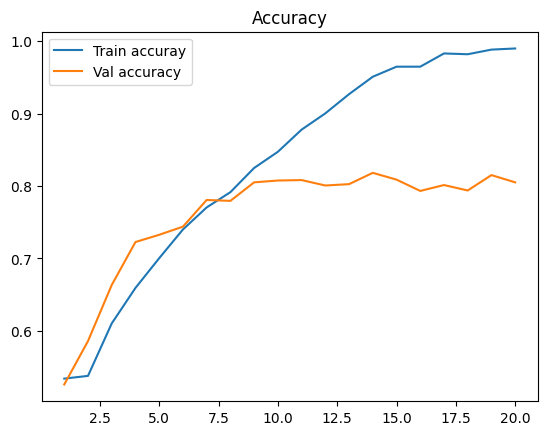

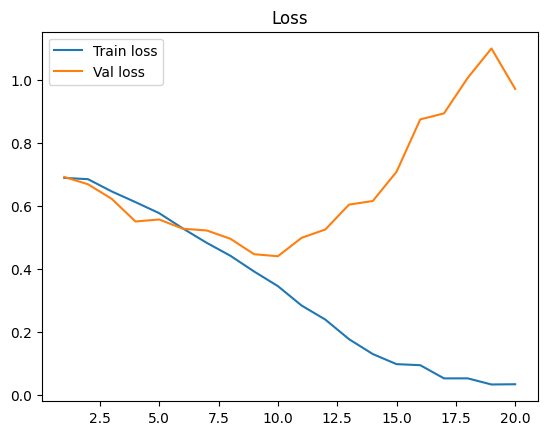

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, label="Train accuray")
plt.plot(epochs, val_accuracy, label="Val accuracy")
plt.title("Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, label="Train loss")
plt.plot(epochs, val_loss, label="Val loss")
plt.title("Loss")
plt.legend()
plt.show()

In [ ]:
best_model = keras.models.load_model('convnet.keras')
test_loss, test_acc = best_model.evaluate(test_dataset)
(test_loss, test_acc)

64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.8029 - loss: 0.4577


(0.45029187202453613, 0.807217001914978)

### VGG16

In [ ]:
vgg16_conv_base = keras.applications.vgg16.VGG16(weights=None, include_top=False, input_shape=(256, 256, 3))
vgg16_conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
vgg16_full = keras.Sequential([
    vgg16_conv_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])
vgg16_full.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
vgg16_full.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 8, 8, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,103,809 (88.13 MB)

 Trainable params: 23,103,809 (88.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath='vgg16.keras', monitor='val_loss', save_best_only=True)
]
history_vgg16 = model.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=callbacks)

Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 15s 73ms/step - accuracy: 0.9890 - loss: 0.0321 - val_accuracy: 0.8095 - val_loss: 1.0629
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 21s 76ms/step - accuracy: 0.9795 - loss: 0.0565 - val_accuracy: 0.8082 - val_loss: 1.0438
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 20s 75ms/step - accuracy: 0.9876 - loss: 0.0374 - val_accuracy: 0.7883 - val_loss: 1.1932
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 21s 76ms/step - accuracy: 0.9845 - loss: 0.0498 - val_accuracy: 0.7970 - val_loss: 1.2187
Epoch 5/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - accuracy: 0.9873 - loss: 0.0433 - val_accuracy: 0.8126 - val_loss: 1.0709
Epoch 6/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 15s 76ms/step - accuracy: 0.9944 - loss: 0.0158 - val_accuracy: 0.8020 - val_loss: 1.1536
Epoch 7/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - accuracy: 0.9935 - loss: 0.0178 - val_accuracy: 0.7933 - val_loss: 1.4745
Epoch 8/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 21s 76ms/step - accuracy: 0.9819 - loss: 0.0491 - 

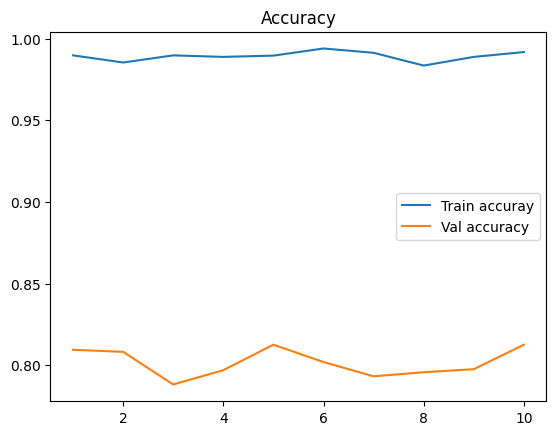

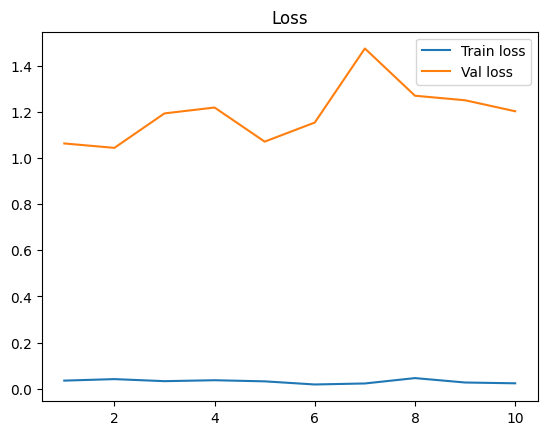

In [ ]:
accuracy = history_vgg16.history["accuracy"]
val_accuracy = history_vgg16.history["val_accuracy"]
loss = history_vgg16.history["loss"]
val_loss = history_vgg16.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, label="Train accuray")
plt.plot(epochs, val_accuracy, label="Val accuracy")
plt.title("Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, label="Train loss")
plt.plot(epochs, val_loss, label="Val loss")
plt.title("Loss")
plt.legend()
plt.show()

In [ ]:
vgg16_full_best = keras.models.load_model('vgg16.keras')
test_loss, test_acc = vgg16_full_best.evaluate(test_dataset)
(test_loss, test_acc)

64/64 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - accuracy: 0.7940 - loss: 1.0783


(1.0972023010253906, 0.7973306775093079)

### ResNet50

In [ ]:
resnet_base = keras.applications.ResNet50(include_top=False, weights=None, input_shape=(256,256,3))
resnet_base.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
resnet_full = keras.Sequential([
    resnet_base,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])
resnet_full.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
resnet_full.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 8, 8, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    16,777,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,365,185 (153.98 MB)

 Trainable params: 40,312,065 (153.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath='resnet.keras', monitor='val_loss', save_best_only=True, verbose=2)
]
history_resnet = resnet_full.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=callbacks)

Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 459ms/step - accuracy: 0.4968 - loss: 12.7299
Epoch 1: val_loss improved from inf to 0.74807, saving model to resnet.keras
201/201 ━━━━━━━━━━━━━━━━━━━━ 176s 552ms/step - accuracy: 0.4968 - loss: 12.6948 - val_accuracy: 0.4984 - val_loss: 0.7481
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - accuracy: 0.4986 - loss: 0.6934
Epoch 2: val_loss improved from 0.74807 to 0.69317, saving model to resnet.keras
201/201 ━━━━━━━━━━━━━━━━━━━━ 80s 392ms/step - accuracy: 0.4986 - loss: 0.6934 - val_accuracy: 0.4984 - val_loss: 0.6932
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step - accuracy: 0.4939 - loss: 0.6932
Epoch 3: val_loss improved from 0.69317 to 0.69316, saving model to resnet.keras
201/201 ━━━━━━━━━━━━━━━━━━━━ 82s 394ms/step - accuracy: 0.4940 - loss: 0.6932 - val_accuracy: 0.4984 - val_loss: 0.6932
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step - accuracy: 0.4857 - loss: 0.6932
Epoch 4: val_loss improved from 0.69316 to 0.6

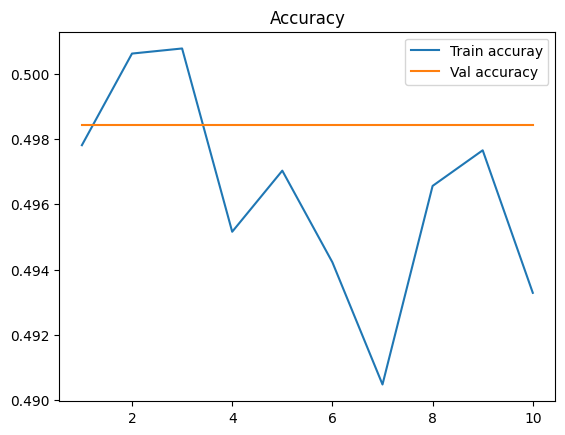

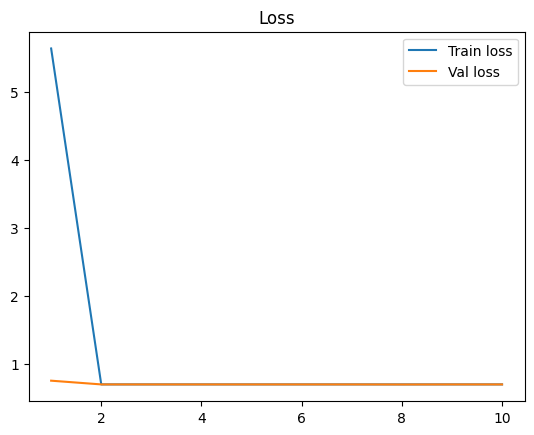

In [ ]:
accuracy = history_resnet.history["accuracy"]
val_accuracy = history_resnet.history["val_accuracy"]
loss = history_resnet.history["loss"]
val_loss = history_resnet.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, label="Train accuray")
plt.plot(epochs, val_accuracy, label="Val accuracy")
plt.title("Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, label="Train loss")
plt.plot(epochs, val_loss, label="Val loss")
plt.title("Loss")
plt.legend()
plt.show()

In [ ]:
resnet_full_best = keras.models.load_model('resnet.keras')
test_loss, test_acc = resnet_full_best.evaluate(test_dataset)
(test_loss, test_acc)

64/64 ━━━━━━━━━━━━━━━━━━━━ 15s 148ms/step - accuracy: 0.4932 - loss: 0.6932


(0.6926763653755188, 0.5002471804618835)

### Сравнение моделей

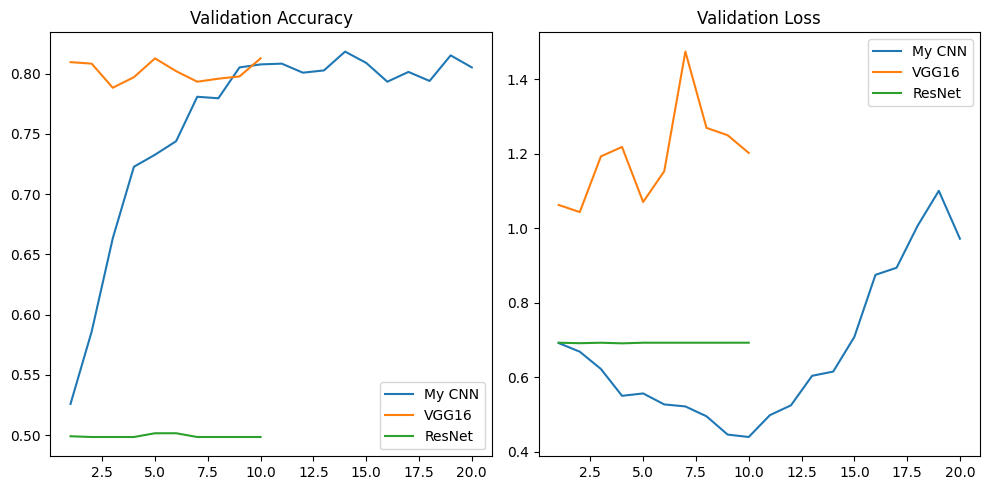

In [ ]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10,5))

axes[0].set_title('Validation Accuracy')
axes[0].plot(range(1, 21), history.history['val_accuracy'], label='My CNN')
axes[0].plot(range(1, 11), history_vgg16.history['val_accuracy'], label='VGG16')
axes[0].plot(range(1, 11), history_resnet.history['val_accuracy'], label='ResNet')
axes[0].legend()

axes[1].set_title('Validation Loss')
axes[1].plot(range(1, 21), history.history['val_loss'], label='My CNN')
axes[1].plot(range(1, 11), history_vgg16.history['val_loss'], label='VGG16')
axes[1].plot(range(1, 11), history_resnet.history['val_loss'], label='ResNet')
axes[1].legend()

plt.tight_layout()
plt.show()

### Аугментация

Теперь остановимся на архитектуре, включающей в себя resnet, и рассмотрим два способа дополнения обычной модели. Во-первых, можно аугментировать данные. Ознакомьтесь со слоями аугментации (https://keras.io/api/layers/preprocessing_layers/image_augmentation/) и обучите модель уже на модифицированных изображениях с нуля, но с сохранением той же архитектуры и тех же параметров обучения. Сравните с исходным результатом. (Ссылка для pytorch: https://pytorch.org/vision/stable/transforms.html)

In [ ]:
augmentation_layer = keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
    layers.Rescaling(1./255),
])

In [ ]:
resnet_full_clone = keras.models.clone_model(resnet_full)
resnet_augmentation = keras.Sequential([
    augmentation_layer,
    resnet_full_clone,
])
resnet_augmentation.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

callbacks = [
    keras.callbacks.ModelCheckpoint('resnet_augmentation.keras', monitor='val_loss', verbose=2, save_best_only=True)
]

resnet_augmentation_history = resnet_augmentation.fit(train_dataset, epochs=10, callbacks=callbacks, validation_data=val_dataset)

Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 662ms/step - accuracy: 0.5043 - loss: 7.6304
Epoch 1: val_loss improved from inf to 0.69319, saving model to resnet_augmentation.keras
201/201 ━━━━━━━━━━━━━━━━━━━━ 204s 813ms/step - accuracy: 0.5043 - loss: 7.6055 - val_accuracy: 0.4984 - val_loss: 0.6932
Epoch 2/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 656ms/step - accuracy: 0.5283 - loss: 0.6925
Epoch 2: val_loss improved from 0.69319 to 0.68511, saving model to resnet_augmentation.keras
201/201 ━━━━━━━━━━━━━━━━━━━━ 189s 777ms/step - accuracy: 0.5283 - loss: 0.6925 - val_accuracy: 0.5472 - val_loss: 0.6851
Epoch 3/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 651ms/step - accuracy: 0.5387 - loss: 0.6975
Epoch 3: val_loss did not improve from 0.68511
201/201 ━━━━━━━━━━━━━━━━━━━━ 141s 702ms/step - accuracy: 0.5386 - loss: 0.6975 - val_accuracy: 0.4991 - val_loss: 0.6933
Epoch 4/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 632ms/step - accuracy: 0.5064 - loss: 0.6934
Epoch 4: val_loss did not improve from 0.68511
201/201

In [ ]:
resnet_augmentation.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 1)              │    40,365,185 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120,989,317 (461.54 MB)

 Trainable params: 40,312,065 (153.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

 Optimizer params: 80,624,132 (307.56 MB)

In [ ]:
resnet_augmentation_best = keras.models.load_model('resnet_augmentation.keras')
test_loss, test_acc = resnet_augmentation_best.evaluate(test_dataset)
(test_loss, test_acc)

64/64 ━━━━━━━━━━━━━━━━━━━━ 15s 159ms/step - accuracy: 0.5607 - loss: 0.6799


(0.6795374751091003, 0.5684626698493958)

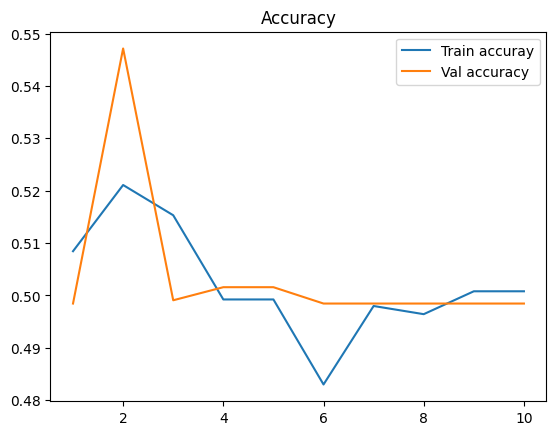

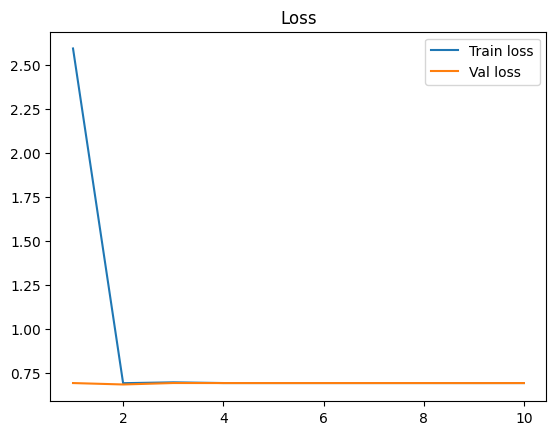

In [ ]:
accuracy = resnet_augmentation_history.history["accuracy"]
val_accuracy = resnet_augmentation_history.history["val_accuracy"]
loss = resnet_augmentation_history.history["loss"]
val_loss = resnet_augmentation_history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, label="Train accuray")
plt.plot(epochs, val_accuracy, label="Val accuracy")
plt.title("Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, label="Train loss")
plt.plot(epochs, val_loss, label="Val loss")
plt.title("Loss")
plt.legend()
plt.show()

| Подход   | Test accuracy | Test loss |
|----------|---------------|-----------|
| no aug   | 0.5002        | 0.6926    |
| with aug | 0.5684        | 0.6795    |

### Перенос обучения (Imagenet)

Наконец, используйте перенос обучения. Для этого достаточно просто установить параметр weights='imagenet'. Перенос обучения позволяет установить веса в начале обучения определенным образом вместо рандомной инициализации, в данном случае используются веса resnet50, обученного на датасете imagenet. Точно также обучите сеть, сохраняя все остальные параметры, на немодифицированных данных, и сравните результаты.

In [ ]:
resnet_base = keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(256,256,3))
resnet_base.trainable = False
resnet_base.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 262, 262,  │          0 │ input_layer_4[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 128, 128,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 128, 128,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 128, 128,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 130, 130,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 64, 64,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 64, 64,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 64, 64,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 64, 64,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 64, 64,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 64, 64,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 64, 64,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 64, 64,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 64, 64,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 64, 64,    │      1,024 │ conv2_block1_3_c

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
resnet_full = keras.Sequential([
    resnet_base,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])
resnet_full.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
resnet_full.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 8, 8, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    16,777,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,365,185 (153.98 MB)

 Trainable params: 16,777,473 (64.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(filepath='resnet_imagenet.keras', monitor='val_loss', save_best_only=True, verbose=2)
]
history_resnet_imagenet = resnet_full.fit(train_dataset, epochs=10, validation_data=val_dataset, callbacks=callbacks)

Epoch 1/10
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.9281 - loss: 1.6765
Epoch 1: val_loss improved from inf to 0.10631, saving model to resnet_imagenet.keras
201/201 ━━━━━━━━━━━━━━━━━━━━ 47s 182ms/step - accuracy: 0.9283 - loss: 1.6721 - val_accuracy: 0.9713 - val_loss: 0.1063
Epoch 2/10
200/201 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9703 - loss: 0.1068
Epoch 2: val_loss improved from 0.10631 to 0.06380, saving model to resnet_imagenet.keras
201/201 ━━━━━━━━━━━━━━━━━━━━ 32s 157ms/step - accuracy: 0.9703 - loss: 0.1067 - val_accuracy: 0.9825 - val_loss: 0.0638
Epoch 3/10
200/201 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.9836 - loss: 0.0604
Epoch 3: val_loss did not improve from 0.06380
201/201 ━━━━━━━━━━━━━━━━━━━━ 25s 126ms/step - accuracy: 0.9836 - loss: 0.0605 - val_accuracy: 0.9788 - val_loss: 0.0687
Epoch 4/10
200/201 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9846 - loss: 0.0466
Epoch 4: val_loss did not improve from 0.06380
201/201 ━━━━━━━━━━

In [ ]:
resnet_imagenet_best = keras.models.load_model('resnet_imagenet.keras')
test_loss, test_acc = resnet_imagenet_best.evaluate(test_dataset)
(test_loss, test_acc)

64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 126ms/step - accuracy: 0.9816 - loss: 0.0914


(0.07292961329221725, 0.9817103147506714)

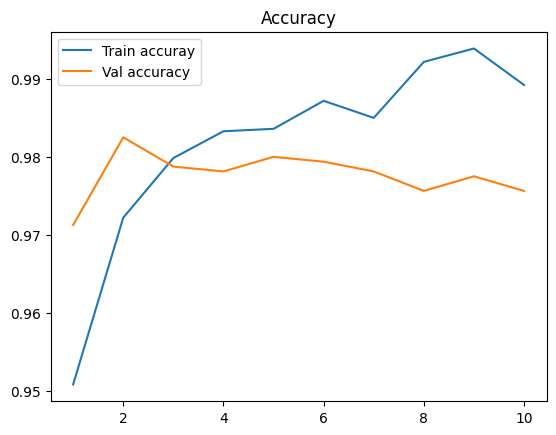

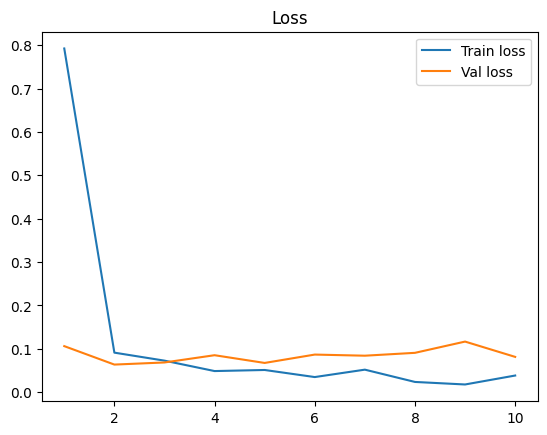

In [ ]:
accuracy = history_resnet_imagenet.history["accuracy"]
val_accuracy = history_resnet_imagenet.history["val_accuracy"]
loss = history_resnet_imagenet.history["loss"]
val_loss = history_resnet_imagenet.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, label="Train accuray")
plt.plot(epochs, val_accuracy, label="Val accuracy")
plt.title("Accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, label="Train loss")
plt.plot(epochs, val_loss, label="Val loss")
plt.title("Loss")
plt.legend()
plt.show()

Итоговое сравнение:

| Подход                 | Test accuracy | Test loss |
|------------------------|---------------|-----------|
| my resnet no aug       | 0.5002        | 0.6926    |
| my resnet with aug     | 0.5684        | 0.6795    |
| imagenet resnet no aug | 0.9817        | 0.0729    |